# Feature Engineering and Data Processing 

##### we have created the following columns

- family_size
- age_band
- is_small_family
- is_large_family
- Fare_cat
- ticket_len
- ticket_letter
- cabin_letter

#### we have imputed the following columns 

- Cabin
- Embarked

In [198]:
# import packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set()

In [199]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [200]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


### create family_size and is_alone column

- sibsp + parch + themselves

In [201]:
train['family_size'] = train['SibSp'] + train['Parch'] + 1
test['family_size'] = test['SibSp'] + test['Parch'] + 1

for data in [train, test]:
    data['is_alone'] =0
    data.loc[(data['family_size'] == 1), 'is_alone'] = 1

In [202]:
# create age_band, missing age data is fallen in age_band == 0
for data in [train, test]:
    data['age_band'] =0
    data.loc[data['Age'] <= 16,'age_band'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'age_band'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'age_band'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'age_band'] = 3
    data.loc[(data['Age'] > 64), 'age_band'] = 3

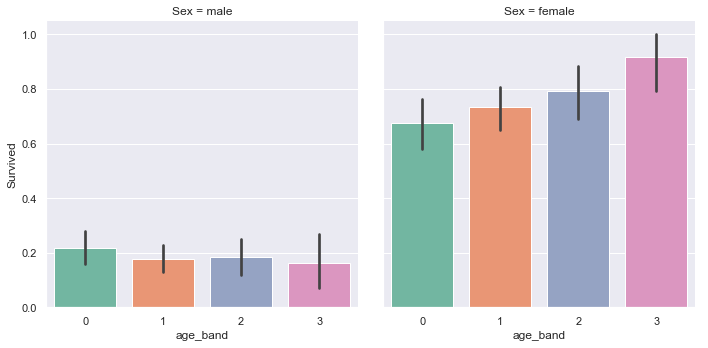

In [203]:
sns.catplot(x='age_band',y='Survived',data=train,col='Sex', kind="bar", palette="Set2")
plt.show()

In [204]:
# create is_small_family and is_large_family variables

for data in [train, test]:
    data['is_small_family'] = data['family_size'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    data['is_large_family'] = data['family_size'].map(lambda s: 1 if 5 <= s else 0)

In [205]:
# create fare_category
for data in [train, test]:
    data['Fare_cat']=0
    data.loc[data['Fare'] <= 7.91,'Fare_cat'] = 0
    data.loc[(data['Fare']>7.91) & (data['Fare'] <= 14.454),'Fare_cat'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31),'Fare_cat'] = 2
    data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513),'Fare_cat'] = 3

In [206]:
# create ticket_length and ticket_first_letter
for data in [train, test]:
    data['ticket_len'] = data['Ticket'].apply(len)  
    data['ticket_letter'] = data['Ticket'].str[0]

In [207]:
# create the chart of ticket relation
ticket_len = train[['ticket_len', 'Survived']].groupby(['ticket_len'], as_index=False).mean().sort_values(by='Survived', ascending=False)
ticket_letter = train[['ticket_letter', 'Survived']].groupby(['ticket_letter'], as_index=False).mean().sort_values(by='Survived', ascending=False)
ticket_len

,ticket_len,Survived
2,5,0.618321
5,8,0.539474
13,17,0.428571
9,12,0.400000
10,13,0.400000
1,4,0.366337
7,10,0.341463
11,15,0.333333
3,6,0.319809
4,7,0.296296


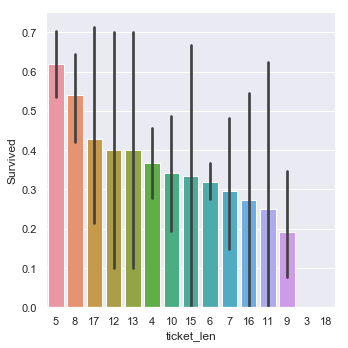

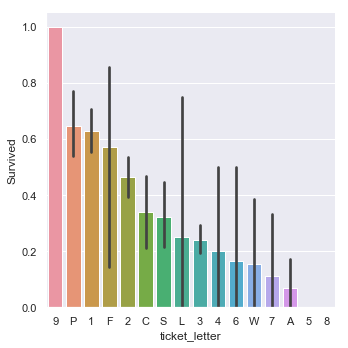

In [208]:
sns.catplot(x='ticket_len', y="Survived", data=train , kind="bar", order=ticket_len['ticket_len'])
sns.catplot(x='ticket_letter', y="Survived", data=train, kind="bar", order=ticket_letter['ticket_letter'])

In [209]:
all_df = pd.concat([train, test],sort = True)
#Displaying values counts
print(all_df['ticket_letter'].value_counts())

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
7     13
F     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: ticket_letter, dtype: int64


regarding W, 7, F, 4, 6, L, 5, 9, 8 they are rare letters, so we pass the label rare

In [210]:
# replace the entries Rare_Low_Survival and Rare_high_Survival
for data in [train, test]:
    data['ticket_letter'] = data['ticket_letter'].replace(['W', '4', '7', '6', 'L', '5', '8'], 'Rare_Low_Survival')
    data['ticket_letter'] = data['ticket_letter'].replace(['F', '9'], 'Rare_High_Survival')

In [211]:
# impute NO to missing data and add cabin_letter column 

for data in [train, test]:
  #Filling missing values
  data['Cabin'] = data['Cabin'].fillna('N0')
  #Getting the first letter of the column
  data['cabin_letter'] = data['Cabin'].str[0]

# we not have T at test data so we replace it 
train['cabin_letter'] = train['cabin_letter'].replace(['T'], 'N')

In [212]:
# impute Embarked 
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode().iloc[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode().iloc[0])

# encoding / drop the columns
- what is the best encoding in this dataset? / encode all categorical variables thats stored as integers
- which columns contribute to survival percentage

In [213]:
#removing all columns that we don't need
train.drop(['PassengerId','Name','Ticket', 'Cabin','Fare','Age','SibSp','Parch'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket', 'Cabin','Fare','Age','SibSp','Parch'],axis=1,inplace=True)

In [214]:

#handling categorical variables
train = pd.get_dummies(train, columns=['Sex','Embarked', 'Pclass','ticket_letter','cabin_letter', 'Fare_cat','is_small_family','is_large_family'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex','Embarked', 'Pclass','ticket_letter','cabin_letter', 'Fare_cat','is_small_family','is_large_family'], drop_first=True)


# standardization 
- standardize the data with train data frame and apply it to both tran and test data

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# drop response variable and fit
scaler.fit(train.drop(['Survived'],axis=1))

# transform train
scaled_features = scaler.transform(train.drop(['Survived'],axis=1))
train_scaled = pd.DataFrame(scaled_features) 

# transform test
scaled_features = scaler.transform(test)
test_scaled = pd.DataFrame(scaled_features)



In [219]:
# train_scaled.to_csv('./data/train_scaled.csv')
# test_scaled.to_csv('./data/test_scaled.csv')

split train data into explanatory and response variabless

as test data frame dose not already have Survived, just store

split scaled data to explanatroy and response and store test scaled data frame

In [223]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
X_test = test

X_scaled = train_scaled
y_scaled = train['Survived']
X_test_scaled = test_scaled

In [229]:
# import the sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score


In [230]:
from sklearn.model_selection import cross_val_score

cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.3, train_size = 0.6, random_state = 0)

## Support Vector Machine 

##### non-scaled

In [235]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc = cross_val_score(svc, X, y, cv=cross_validation_split, scoring='accuracy')
print('*************10 times each*************')
print(scores_svc)
print('****************average****************')
print(scores_svc.mean())

*************10 times each*************
[0.81716418 0.80970149 0.84328358 0.81343284 0.82089552 0.80223881
 0.80223881 0.80597015 0.82462687 0.8619403 ]
****************average****************
0.8201492537313433


##### scaled

In [236]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc_sc = cross_val_score(svc, X_scaled, y_scaled, cv=cross_validation_split, scoring='accuracy')
print('*************10 times each*************')
print(scores_svc_sc)
print('****************average****************')
print(scores_svc_sc.mean())

*************10 times each*************
[0.7761194  0.79477612 0.77985075 0.81343284 0.83208955 0.80223881
 0.80597015 0.80970149 0.81343284 0.85447761]
****************average****************
0.8082089552238806


## Random Forest

In [237]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X, y, cv=cross_validation_split, scoring='accuracy')
print('*************10 times each*************')
print(scores_rfc)
print('****************average****************')
print(scores_rfc.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

*************10 times each*************
[0.80970149 0.81343284 0.80597015 0.79850746 0.83208955 0.79477612
 0.80597015 0.80597015 0.81716418 0.82835821]
****************average****************
0.8111940298507463
